# Bombing Operations during the Vietnam War

## Introduction
### History
The Vietnam War was one of the costliest and most divisive conflicts the US has been involved in, to date. While no formal declaration of war was issued, American advisors had been involved in the Indochina region since the French occupation post-World War II. Formal US involvement began in earnest in 1964, after the [Gulf of Tonkin incident](https://en.wikipedia.org/wiki/Gulf_of_Tonkin_incident).  

The US and its allies relied heavily on air superiority to carry out offensive operations. The US also conducted large-scale strategic bombing campaigns in North Vietnam, some of the largest since the end of the Second World War. In the end, however, US involvement was not enough to prop up the South Vietnamese government and armed forces. As a result of the [Tet Offensive](https://en.wikipedia.org/wiki/Tet_Offensive), which showed the clear inabilitiy of the [ARVN](https://en.wikipedia.org/wiki/Army_of_the_Republic_of_Vietnam) to resist [NVA](https://en.wikipedia.org/wiki/People%27s_Army_of_Vietnam) forces, the US began to implement ["Vietnamization"](https://en.wikipedia.org/wiki/Vietnamization). Two years after the withdraw of US forces in August 1973, Saigon fell to the NVA, and North and South Vietnam were reunited the following year (1976).  

### U.S. Air Force Doctrine
USAF doctrine during this period focused heavily on close-air support and massive strategic bombing campaigns. Because of the notoriously thick jungle environment of Vietnam, close-air support aircraft began carrying napalm. As well, missions using Agent Orange were flown to defoliate the jungle, to try and increase the effectiveness of air support assets.  

Strategic bombing was a mainstay of the USAF bomber doctrine, ever since the end of the Second World War. However, because of fears of drawing China into the conflict, targets were heavily limited by the Johnson and Nixon administrations. As a result, the effectiveness of these strategic bombing campaigns were limited. When they were effectively employed, heavy bombers, such as the B-52, mainly targetted large factory complexes, in an attempt to degrade the North Vietnamese supply line and warfighting capabilities.  

Because of the general inaccuracy of carpet bombing, and the increased visibility of civilian casualties, more precise weapon systems were developed. These would heavily influence Air Force doctrine for the years to come.

![](b52_linebacker.jpg)

## Loading the Data

In [1]:
import re
import zipfile
import time
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
start = time.time()
z = zipfile.ZipFile('vietnam-war-bombing-operations.zip')
aircrafts = pd.read_csv(z.open('THOR_Vietnam_Aircraft_Glossary.csv'), encoding = 'ISO-8859-1')
weapons = pd.read_csv(z.open('THOR_Vietnam_Weapons_Glossary.csv'),encoding = 'ISO-8859-1')
bombing_ops = pd.read_csv(z.open('THOR_Vietnam_Bombing_Operations.csv'))
end = time.time()
print(f'3 files loaded in {end - start} seconds')

3 files loaded in 47.64586091041565 seconds


In [3]:
print('------DATASET SHAPES------')
print('BOMBING OPS:', bombing_ops.shape)
print('AIRCRAFT:', aircrafts.shape)
print('WEAPONS:', weapons.shape)

------DATASET SHAPES------
BOMBING OPS: (4670416, 47)
AIRCRAFT: (104, 8)
WEAPONS: (294, 6)


In [7]:
bombing_ops.head(3)

,THOR_DATA_VIET_ID,COUNTRYFLYINGMISSION,MILSERVICE,MSNDATE,SOURCEID,SOURCERECORD,VALID_AIRCRAFT_ROOT,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,...,GEOZONE,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
0,351,UNITED STATES OF AMERICA,USAF,1971-06-05,647464,SEADAB,EC-47,TAN SON NHUT,NaN,NaN,...,NaN,27135863,NONKINETIC,-1,-1,NaN,NaN,NaN,1005.0,0
1,2,UNITED STATES OF AMERICA,USAF,1972-12-26,642778,SEADAB,EC-47,NAKHON PHANOM,NaN,NaN,...,NaN,27131177,NONKINETIC,-1,-1,NaN,NaN,NaN,530.0,0
2,3,UNITED STATES OF AMERICA,USAF,1973-07-28,642779,SEADAB,RF-4,UDORN AB,NaN,NaN,...,NaN,27131178,NONKINETIC,-1,-1,NaN,NaN,NaN,730.0,0


In [7]:
bombing_ops.columns

Index(['COUNTRYFLYINGMISSION', 'MILSERVICE', 'MSNDATE', 'SOURCEID',
       'SOURCERECORD', 'VALID_AIRCRAFT_ROOT', 'TAKEOFFLOCATION',
       'TGTLATDD_DDD_WGS84', 'TGTLONDDD_DDD_WGS84', 'TGTTYPE',
       'NUMWEAPONSDELIVERED', 'TIMEONTARGET', 'WEAPONTYPE', 'WEAPONTYPECLASS',
       'WEAPONTYPEWEIGHT', 'AIRCRAFT_ORIGINAL', 'AIRCRAFT_ROOT',
       'AIRFORCEGROUP', 'AIRFORCESQDN', 'CALLSIGN', 'FLTHOURS', 'MFUNC',
       'MFUNC_DESC', 'MISSIONID', 'NUMOFACFT', 'OPERATIONSUPPORTED',
       'PERIODOFDAY', 'UNIT', 'TGTCLOUDCOVER', 'TGTCONTROL', 'TGTCOUNTRY',
       'TGTID', 'TGTORIGCOORDS', 'TGTORIGCOORDSFORMAT', 'TGTWEATHER',
       'ADDITIONALINFO', 'GEOZONE', 'ID', 'MFUNC_DESC_CLASS',
       'NUMWEAPONSJETTISONED', 'NUMWEAPONSRETURNED', 'RELEASEALTITUDE',
       'RELEASEFLTSPEED', 'RESULTSBDA', 'TIMEOFFTARGET',
       'WEAPONSLOADEDWEIGHT'],
      dtype='object')

In [6]:
aircrafts.head(3)

,GLOSS_ID,VALIDATED_ROOT,AIRCRAFT_NAME,WEBSITE_LINK,AIRCRAFT_TYPE,AIRCRAFT_SHORTNAME,AIRCRAFT_APPLICATION,AC_MISSION_COUNT
0,1,A-1,Douglas A-1 Skyraider,http://www.navalaviationmuseum.org/attractions...,Fighter Jet,Skyraider,FIGHTER,373265
1,2,A-26,Douglas A-26 Invader,http://www.militaryfactory.com/aircraft/detail...,Light Bomber,Invader,BOMBER,36672
2,4,A-37,Cessna A-37 Dragonfly,http://www.militaryfactory.com/aircraft/detail...,Light ground-attack aircraft,Dragonfly,ATTACK,282699


In [7]:
aircrafts.columns

Index(['GLOSS_ID', 'VALIDATED_ROOT', 'AIRCRAFT_NAME', 'WEBSITE_LINK',
       'AIRCRAFT_TYPE', 'AIRCRAFT_SHORTNAME', 'AIRCRAFT_APPLICATION',
       'AC_MISSION_COUNT'],
      dtype='object')

In [8]:
weapons.head(3)

,WEAPON_ID,WEAPONTYPE,WEAPONTYPE_COMMON_NAME,WEAPON_CLASS,WEAPONTYPE_DESC,WEAPON_COUNT
0,1,100 GP,General Purpose Bomb,BOMB,100 lb general purpose,1
1,2,1000 G,Megaboller flash powder bomb,BOMB,1000 g BKS,2
2,3,1000LB GP M-65,An-M65,BOMB,1000 lb general purpose,12776


In [9]:
weapons.columns

Index(['WEAPON_ID', 'WEAPONTYPE', 'WEAPONTYPE_COMMON_NAME', 'WEAPON_CLASS',
       'WEAPONTYPE_DESC', 'WEAPON_COUNT'],
      dtype='object')

## Data Analysis and Visualization  
### Which country flew the most combat missions?

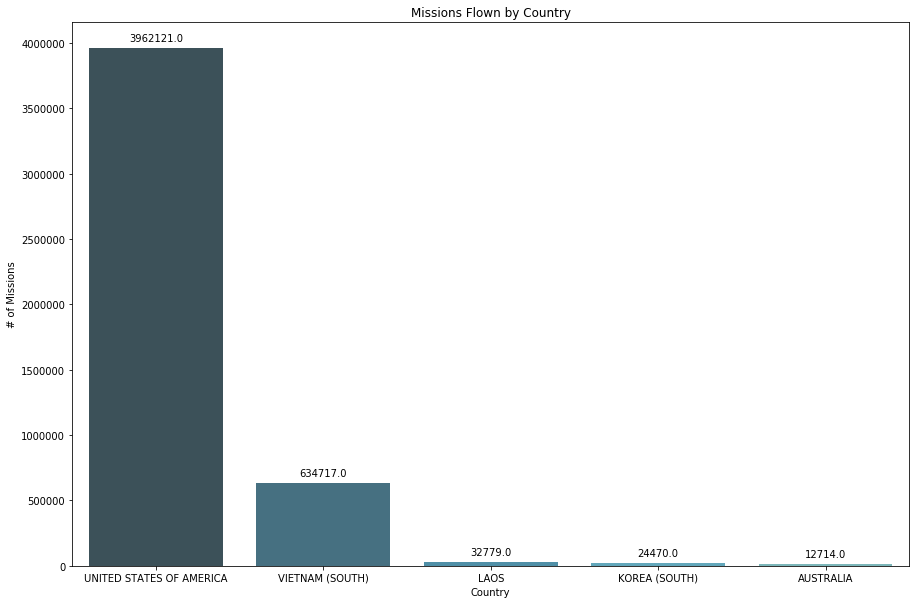

In [37]:
country_missions = bombing_ops.COUNTRYFLYINGMISSION
country_counts = country_missions.value_counts()
countries, y = country_counts.keys().tolist(), country_counts.values

plt.figure(figsize = (15,10))
ax = sns.barplot(x = countries, y = y, palette = sns.color_palette('GnBu_d'))
plt.xlabel('Country')
plt.ylabel('# of Missions')
plt.title('Missions Flown by Country')

# From https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
# Since SNS has no intuitive method to annotate
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

As to be expected, the United States flew the most missions. South Vietnam came in second, which makes sense, given the resources and equipment the US provided for ARVN.

### Which branch flew the most missions for the United States?

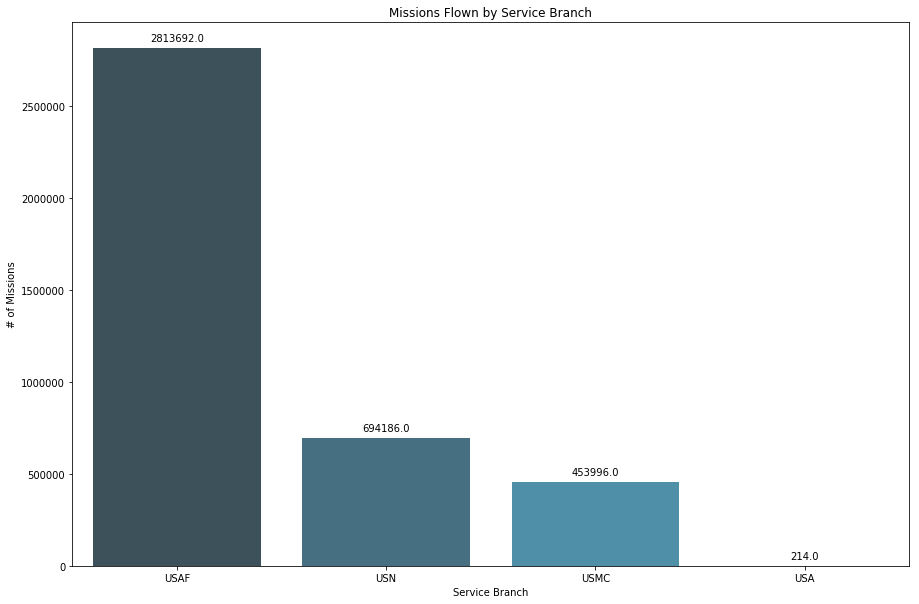

In [9]:
branches = bombing_ops[bombing_ops.COUNTRYFLYINGMISSION == 'UNITED STATES OF AMERICA'].MILSERVICE
branch_counts = branches.value_counts()
x, y = branch_counts.keys().tolist(), branch_counts.values

plt.figure(figsize = (15,10))
ax = sns.barplot(x = x, y = y, palette = sns.color_palette('GnBu_d'))
plt.xlabel('Service Branch')
plt.ylabel('# of Missions')
plt.title('Missions Flown by Service Branch')

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

As expected, the US Air Force flew the most combat sorties of all the four branches. Interestingly, the Army has a number of sorties listed. However, the number is too small to be rotary-wing aircraft, so it seems the Army did have fixed-wing aviation in country during the Vietnam War.

### Which years saw the heaviest bombing, by tonnage?

In [3]:
years = bombing_ops.copy()
years_filt = years[years.NUMWEAPONSDELIVERED > 0]

In [4]:
pat = re.compile(r'(\d{4})-(\d{2})-(\d{2})')
def get_year(row):
    try:
        if re.search(pat, row.MSNDATE):
            match = re.search(pat, row.MSNDATE)
            return match[1]
        else:
            return str(row.MSNDATE)[:4]
    except:
        return None

years_filt['year'] = years_filt.apply(get_year, axis = 1)

In [35]:
def sortie_tonnage(row):
    return (row.NUMWEAPONSDELIVERED * row.WEAPONTYPEWEIGHT) / 2000 # Weapon weight is in lbs; divide by 2000 to get tons

years_filt['sortie_tonnage'] = years_filt.apply(sortie_tonnage, axis = 1)

In [36]:
years_tonnage = years_filt.groupby('year').sum().sortie_tonnage.reset_index()

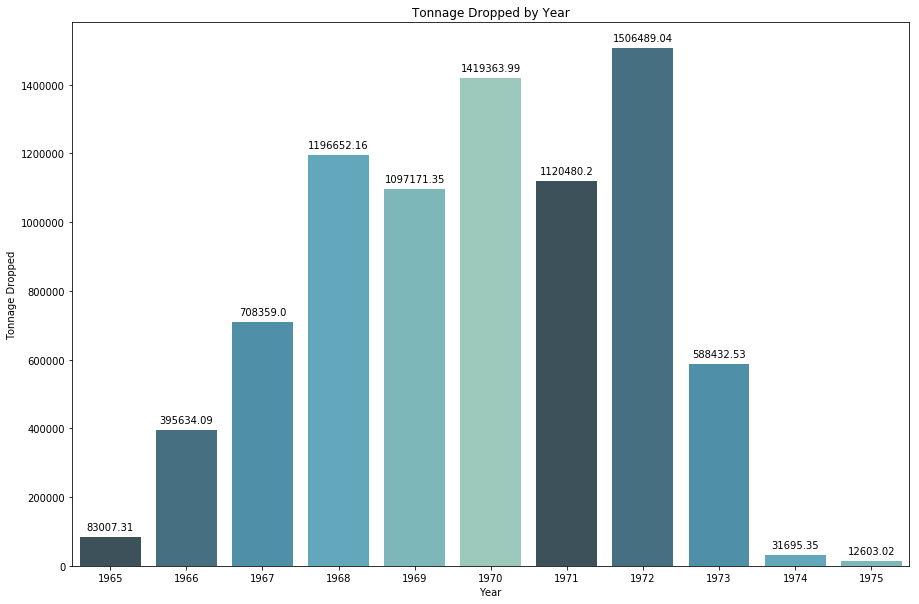

In [37]:
plt.figure(figsize = (15,10))
ax = sns.barplot(x = years_tonnage.year, y = years_tonnage.sortie_tonnage, palette = sns.color_palette('GnBu_d'))
plt.xlabel('Year')
plt.ylabel('Tonnage Dropped')
plt.title('Tonnage Dropped by Year')

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

The year 1972 saw the most bombs dropped by tons (1,506,489.04). In fact, the 82 raids carried out in the first three months of 1972 exceeded all raids carried out during [1971](https://en.wikipedia.org/wiki/1972_in_the_Vietnam_War#cite_note-20). The year 1970 saw the second most tons dropped during the Vietnam War (1,419,363.99 tons).

### Can we predict the country of origin for a bombing mission, given the sortie characteristics?

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree

In [4]:
bombing_ml = bombing_ops[bombing_ops.NUMWEAPONSDELIVERED > 0]
col = 'COUNTRYFLYINGMISSION'
conditions = [
    bombing_ml[col] == 'UNITED STATES OF AMERICA', 
    bombing_ml[col] == 'VIETNAM (SOUTH)',
    bombing_ml[col] == 'LAOS',
    bombing_ml[col] == 'KOREA (SOUTH)',
    bombing_ml[col] == 'AUSTRALIA'
]
choices = [ 0, 1, 2, 3, 4 ]

bombing_ml['type'] = np.select(conditions, choices, default=np.nan).astype('int')

In [12]:
bombing_ml.MFUNC

3           1
5           1
13         48
15          1
21         79
23          5
24          1
25          4
28          3
29          3
30          1
32         48
35          3
36          5
37          1
40          1
41          4
46          4
51         61
52          4
53          5
55          5
57         48
62          5
63          3
64          5
68          4
71         37
73         61
76          1
           ..
4670336    74
4670341    97
4670342     1
4670343     4
4670346    48
4670349    97
4670351    50
4670352     5
4670355     5
4670356    48
4670357     4
4670359     1
4670360    48
4670363    51
4670364     5
4670366     4
4670368     1
4670370     4
4670375     5
4670377     4
4670378    74
4670388    44
4670389     1
4670394    44
4670400    48
4670402    48
4670408    37
4670411     1
4670412     4
4670413     5
Name: MFUNC, Length: 2346224, dtype: object

In [6]:
bombing_ml.nunique()

THOR_DATA_VIET_ID       2346224
COUNTRYFLYINGMISSION          5
MILSERVICE                    9
MSNDATE                    4472
SOURCEID                2016058
SOURCERECORD                  4
VALID_AIRCRAFT_ROOT         100
TAKEOFFLOCATION              85
TGTLATDD_DDD_WGS84       389500
TGTLONDDD_DDD_WGS84      369845
TGTTYPE                     255
NUMWEAPONSDELIVERED        4610
TIMEONTARGET               1555
WEAPONTYPE                  293
WEAPONTYPECLASS               0
WEAPONTYPEWEIGHT             89
AIRCRAFT_ORIGINAL           321
AIRCRAFT_ROOT               111
AIRFORCEGROUP                16
AIRFORCESQDN                 55
CALLSIGN                   9209
FLTHOURS                   2264
MFUNC                       243
MFUNC_DESC                   93
MISSIONID                 49805
NUMOFACFT                   157
OPERATIONSUPPORTED        44898
PERIODOFDAY                  15
UNIT                       1346
TGTCLOUDCOVER                 8
TGTCONTROL                   14
TGTCOUNT

In [17]:
dropped = ['COUNTRYFLYINGMISSION', 'SOURCEID', 'SOURCERECORD', 'MSNDATE', 'AIRCRAFT_ORIGINAL', 
           'AIRCRAFT_ROOT', 'WEAPONTYPECLASS', 'WEAPONTYPE', 'UNIT', 'TGTID', 'TGTWEATHER', 'ADDITIONALINFO', 'TGTORIGCOORDSFORMAT', 
           'TGTWEATHER', 'GEOZONE', 'CALLSIGN', 'TGTTYPE', 'MFUNC_DESC', 'OPERATIONSUPPORTED']
bomb_ml_real = bombing_ml.drop(labels = dropped, axis = 1)
bomb_ml_real.set_index('THOR_DATA_VIET_ID', inplace = True)
bomb_ml_real.dropna(inplace = True, thresh = 24) # To make sure we can actually create dummies, otherwise classifiers won't work
print(bomb_ml_real.shape)
bomb_ml_real.head()

(1103272, 29)


,MILSERVICE,VALID_AIRCRAFT_ROOT,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,NUMWEAPONSDELIVERED,TIMEONTARGET,WEAPONTYPEWEIGHT,AIRFORCEGROUP,AIRFORCESQDN,...,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT,type
THOR_DATA_VIET_ID,,,,,,,,,,,,,,,,,,,,,
5722,USAF,F-4,UBON AB,16.331666,106.479444,2,610.0,0,C,433TFS,...,27183249,NONKINETIC,-1,-1,15.0,55.0,RNO-DLY BM/FU,610.0,0,0
8509,USAF,B-52,ANDERSEN,20.781388,105.864722,28,2046.0,500,NaN,4133SW,...,27611535,NONKINETIC,-1,-1,0.0,NaN,RNO WEATHER,2046.0,148680,0
13041,USAF,A-37,BIEN HOA,11.655833,106.604722,2,1000.0,211,2,8SOS,...,27680052,KINETIC,-1,-1,0.0,30.0,DESTROYED,1000.0,5280,0
20616,USAF,B-52,U TAPAO,21.161111,105.828333,28,1544.0,500,P,307SW,...,27726590,NONKINETIC,-1,-1,0.0,NaN,RNO WEATHER,1544.0,148680,0
58000,USAF,A-1,NAKHON PHANOM,15.423055,107.017777,2,300.0,100,M,1SOS,...,27926285,KINETIC,-1,-1,5.0,20.0,NaN,300.0,1400,0


In [87]:
bombing_final = pd.get_dummies(bomb_ml_real, drop_first = True)
bombing_train, bombing_test = train_test_split(bomb_ml_real, test_size = 0.3)
bombing_score = bombing_test.copy() # For score assessment

MemoryError: 

In [43]:
df_rf = skens.RandomForestClassifier(n_estimators = 10, oob_score = True, criterion = 'entropy', random_state = 42)
df_rf.fit(bombing_train.iloc[:,bombing_train.columns != 'type'], bombing_train.type)

ValueError: could not convert string to float: 'USMC'

### How did bombing missions shift over time?

In [81]:
from datetime import timedelta
import os
import sys
#os.environ['PROJ_LIB'] = r'c:\Users\dteng\AppData\Local\conda\conda\envs\envname\Library\share'
from mpl_toolkits.basemap import Basemap
from PIL import Image

ImportError: cannot import name 'VERSION' from 'PIL' (C:\Users\dteng\Anaconda3\envs\mapping\lib\site-packages\PIL\__init__.py)

In [54]:
mission_lat_lon = years_filt[['COUNTRYFLYINGMISSION', 'TGTLATDD_DDD_WGS84', 'TGTLONDDD_DDD_WGS84', 'year']].rename(
    columns = {'COUNTRYFLYINGMISSION': 'Country', 'TGTLATDD_DDD_WGS84': 'Latitude', 'TGTLONDDD_DDD_WGS84': 'Longitude'})
mission_lat_lon = mission_lat_lon[pd.notnull(mission_lat_lon.Latitude)]
mission_lat_lon = mission_lat_lon[pd.notnull(mission_lat_lon.Country)]
mission_lat_lon = mission_lat_lon[pd.notnull(mission_lat_lon.year)]
mission_lat_lon.head()

,Country,Latitude,Longitude,year
3,UNITED STATES OF AMERICA,16.902500,106.014166,1970
5,UNITED STATES OF AMERICA,19.602222,103.597222,1970
15,UNITED STATES OF AMERICA,17.563611,105.756666,1971
23,VIETNAM (SOUTH),9.707500,104.881388,1971
24,UNITED STATES OF AMERICA,14.620277,107.681944,1972


In [55]:
mission_lat_lon['Latitude'] = mission_lat_lon.Latitude.round(2)
mission_lat_lon['Longitude'] = mission_lat_lon.Longitude.round(2)
mission_lat_lon.drop_duplicates(inplace = True)
mission_lat_lon.shape

(373826, 4)

In [56]:
colors = {
    'UNITED STATES OF AMERICA': 'red',
    'VIETNAM (SOUTH)': 'yellow',
    'LAOS': 'purple',
    'KOREA (SOUTH)': 'green',
    'AUSTRALIA': 'blue'
}
mission_lat_lon['color'] = [colors[c] for c in mission_lat_lon['Country'].values]
mission_lat_lon.head()

,Country,Latitude,Longitude,year,color
3,UNITED STATES OF AMERICA,16.90,106.01,1970,red
5,UNITED STATES OF AMERICA,19.60,103.60,1970,red
15,UNITED STATES OF AMERICA,17.56,105.76,1971,red
23,VIETNAM (SOUTH),9.71,104.88,1971,yellow
24,UNITED STATES OF AMERICA,14.62,107.68,1972,red


In [74]:
def plot_map(year):
    lat = mission_lat_lon[mission_lat_lon.year == year].Latitude.values
    lon = mission_lat_lon[mission_lat_lon.year == year].Longitude.values
    color = mission_lat_lon[mission_lat_lon.year == year].color.values
    
    fig = plt.figure(figsize=(15, 10))
    m = Basemap(projection='lcc', resolution='h',
            width=5E6, height=5E6, 
            lat_0=16, lon_0=100)
    m.drawcountries()
    m.drawcoastlines()

    #Map (long, lat) to (x, y) for plotting
    lons, lats = m(lon, lat)
    # plot points as red dots
    m.scatter(lons, lats, marker = 'o', color = color, s=1)
    plt.title(f'Sorties in {year}')
    plt.show()

In [75]:
sorted(mission_lat_lon.year.unique().tolist())

['1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1975']

{'UNITED STATES OF AMERICA': 'red', 'VIETNAM (SOUTH)': 'yellow', 'LAOS': 'purple', 'KOREA (SOUTH)': 'green', 'AUSTRALIA': 'blue'}


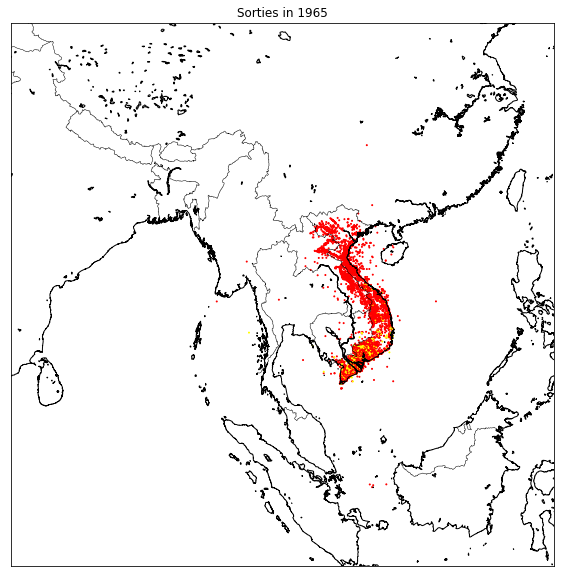

In [76]:
print(colors)
plot_map('1965')

{'UNITED STATES OF AMERICA': 'red', 'VIETNAM (SOUTH)': 'yellow', 'LAOS': 'purple', 'KOREA (SOUTH)': 'green', 'AUSTRALIA': 'blue'}


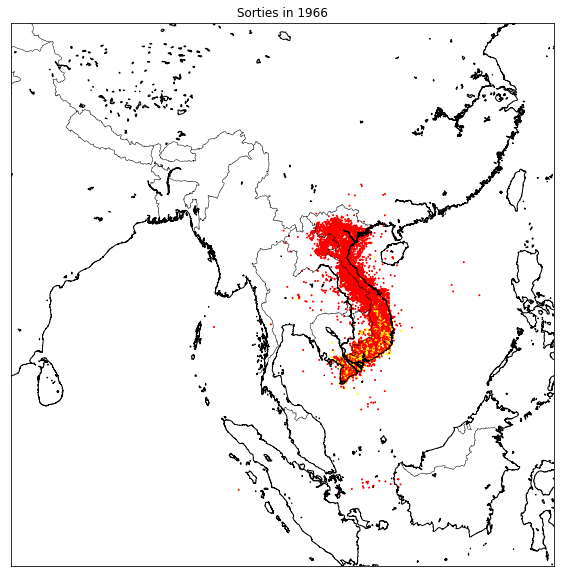

In [63]:
print(colors)
plot_map('1966')

{'UNITED STATES OF AMERICA': 'red', 'VIETNAM (SOUTH)': 'yellow', 'LAOS': 'purple', 'KOREA (SOUTH)': 'green', 'AUSTRALIA': 'blue'}


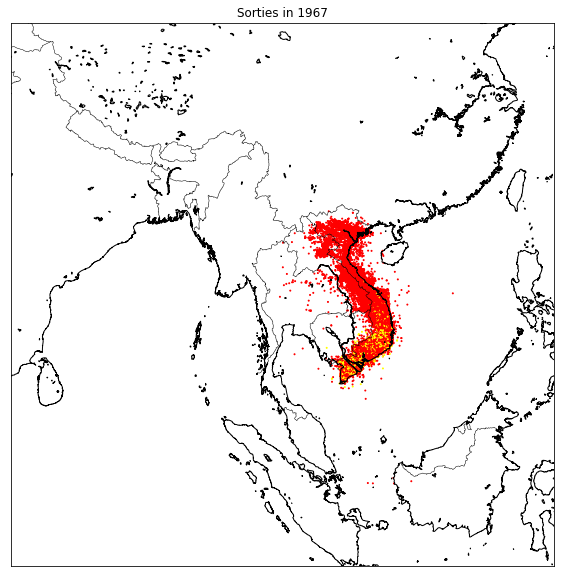

In [64]:
print(colors)
plot_map('1967')

{'UNITED STATES OF AMERICA': 'red', 'VIETNAM (SOUTH)': 'yellow', 'LAOS': 'purple', 'KOREA (SOUTH)': 'green', 'AUSTRALIA': 'blue'}


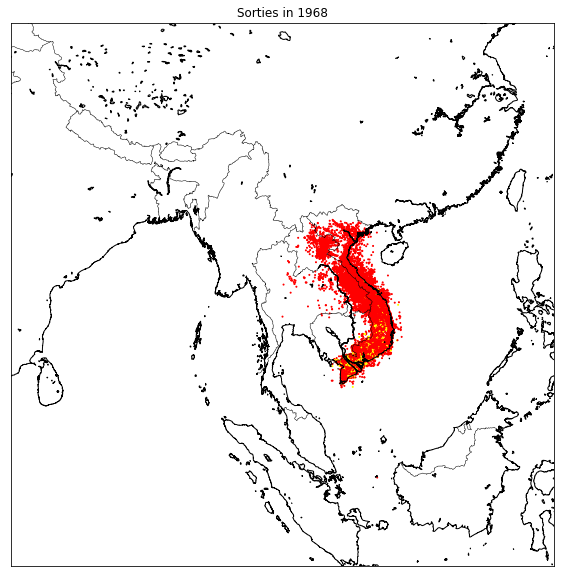

In [65]:
print(colors)
plot_map('1968')

{'UNITED STATES OF AMERICA': 'red', 'VIETNAM (SOUTH)': 'yellow', 'LAOS': 'purple', 'KOREA (SOUTH)': 'green', 'AUSTRALIA': 'blue'}


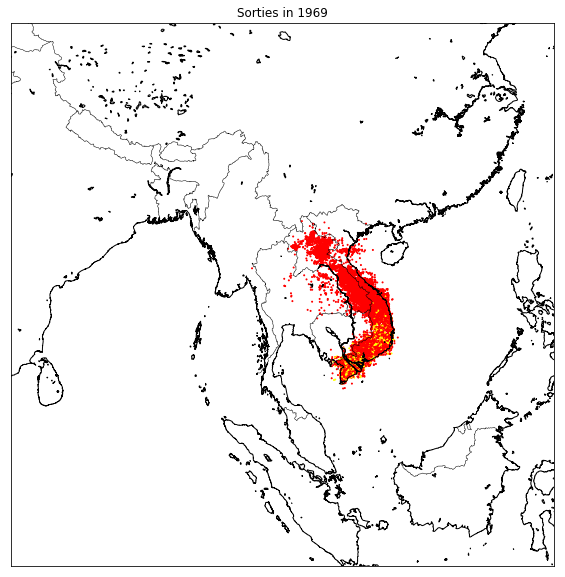

In [66]:
print(colors)
plot_map('1969')

{'UNITED STATES OF AMERICA': 'red', 'VIETNAM (SOUTH)': 'yellow', 'LAOS': 'purple', 'KOREA (SOUTH)': 'green', 'AUSTRALIA': 'blue'}


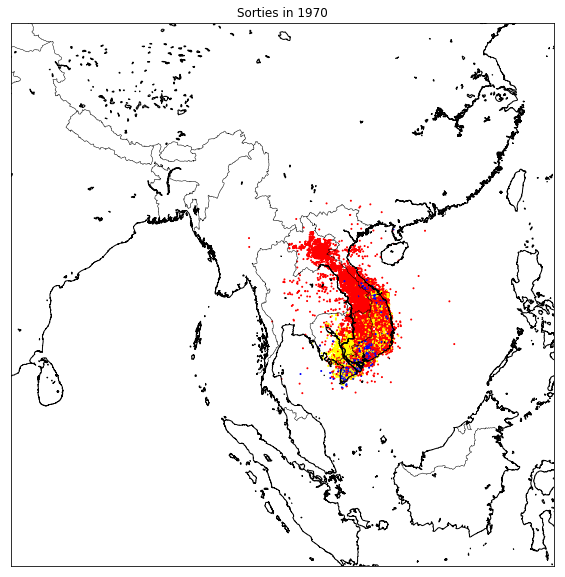

In [67]:
print(colors)
plot_map('1970')

{'UNITED STATES OF AMERICA': 'red', 'VIETNAM (SOUTH)': 'yellow', 'LAOS': 'purple', 'KOREA (SOUTH)': 'green', 'AUSTRALIA': 'blue'}


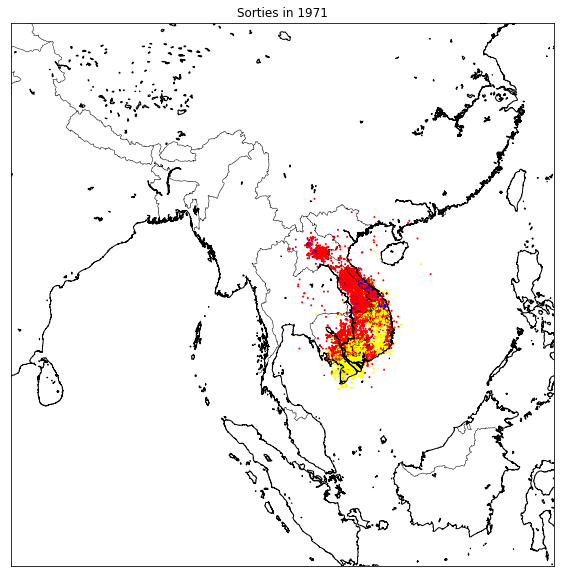

In [68]:
print(colors)
plot_map('1971')

{'UNITED STATES OF AMERICA': 'red', 'VIETNAM (SOUTH)': 'yellow', 'LAOS': 'purple', 'KOREA (SOUTH)': 'green', 'AUSTRALIA': 'blue'}


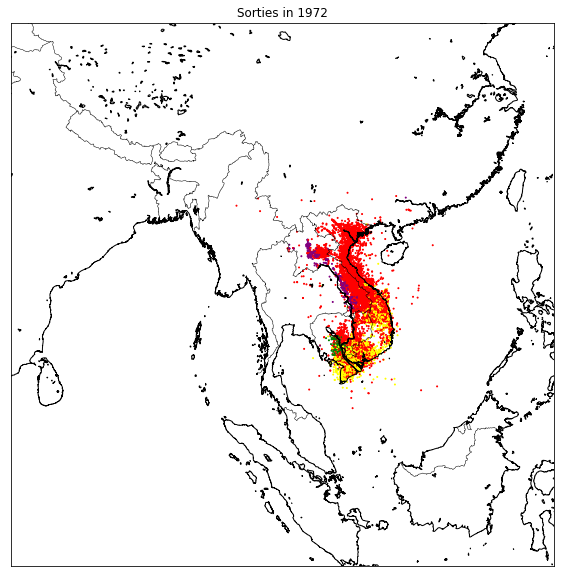

In [69]:
print(colors)
plot_map('1972')

{'UNITED STATES OF AMERICA': 'red', 'VIETNAM (SOUTH)': 'yellow', 'LAOS': 'purple', 'KOREA (SOUTH)': 'green', 'AUSTRALIA': 'blue'}


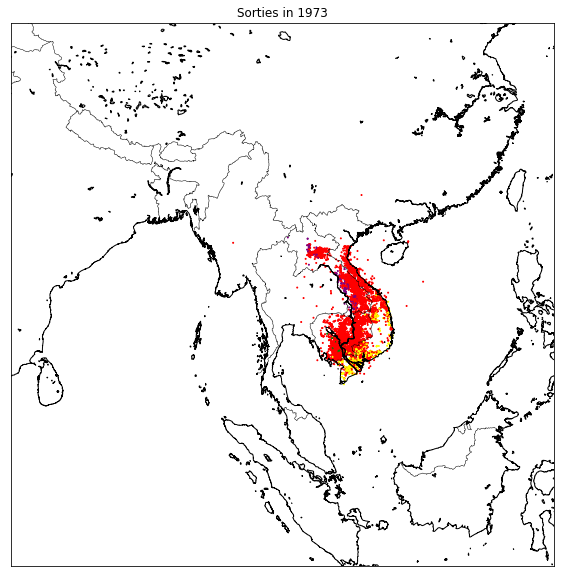

In [70]:
print(colors)
plot_map('1973')

{'UNITED STATES OF AMERICA': 'red', 'VIETNAM (SOUTH)': 'yellow', 'LAOS': 'purple', 'KOREA (SOUTH)': 'green', 'AUSTRALIA': 'blue'}


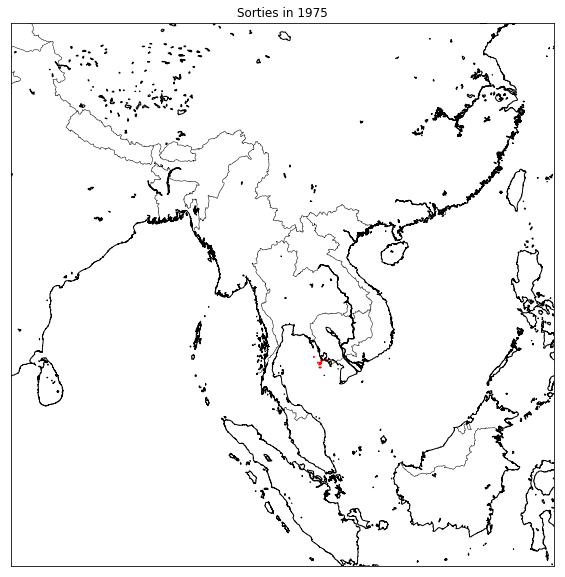

In [71]:
print(colors)
plot_map('1975')